In [44]:
from sklearn.datasets import load_breast_cancer
from scipy.spatial.distance import euclidean
from scipy.spatial.distance import cityblock
from scipy.spatial.distance import chebyshev
from scipy.spatial.distance import cosine
from scipy.spatial.distance import mahalanobis
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
data=load_breast_cancer()
df=pd.DataFrame(data.data,columns=data.feature_names)
#df

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [47]:
X=data.data
Y=data.target

In [48]:
df["Lable"]=data.target


In [49]:
df.shape

(569, 31)

0 = بدخیم (malignant)

1 = خوش‌خیم (benign)

In [50]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Lable
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [51]:
Center_Maligant=X[Y==0].mean()
Center_Benign=X[Y==1].mean()
(Center_Benign,Center_Maligant)

(np.float64(42.66117235570495), np.float64(94.2725320292453))

In [52]:
Maligan_Test=df[df['Lable']==0].sample(n=3,random_state=42)
Benign_Test=df[df['Lable']==1].sample(n=3,random_state=42)
Test=pd.concat([Maligan_Test,Benign_Test])
Test

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Lable
33,19.270,26.47,127.90,1162.0,0.09401,0.17190,0.16570,0.07593,0.1853,0.06261,...,30.90,161.40,1813.0,0.1509,0.6590,0.6091,0.17850,0.3672,0.11230,0
400,17.910,21.02,124.40,994.0,0.12300,0.25760,0.31890,0.11980,0.2113,0.07115,...,27.78,149.60,1304.0,0.1873,0.5917,0.9034,0.19640,0.3245,0.11980,0
274,17.930,24.48,115.20,998.9,0.08855,0.07027,0.05699,0.04744,0.1538,0.05510,...,34.69,135.10,1320.0,0.1315,0.1806,0.2080,0.11360,0.2504,0.07948,0
395,14.060,17.18,89.75,609.1,0.08045,0.05361,0.02681,0.03251,0.1641,0.05764,...,25.34,96.42,684.5,0.1066,0.1231,0.0846,0.07911,0.2523,0.06609,1
110,9.777,16.99,62.50,290.2,0.10370,0.08404,0.04334,0.01778,0.1584,0.07065,...,21.47,71.68,367.0,0.1467,0.1765,0.1300,0.05334,0.2533,0.08468,1
481,13.900,19.24,88.73,602.9,0.07991,0.05326,0.02995,0.02070,0.1579,0.05594,...,26.42,104.40,830.5,0.1064,0.1415,0.1673,0.08150,0.2356,0.07603,1


In [53]:
cov_x=np.cov(X)
Mean_Test=np.mean(X)
cov_inv=np.linalg.inv(cov_x )

In [54]:
cov_matrix = np.cov(Test.T)+1e-10*np.eye(Test.shape[1])
cov_inv = np.linalg.inv(cov_matrix)

فاصله اقلیدسی (Euclidean Distance)

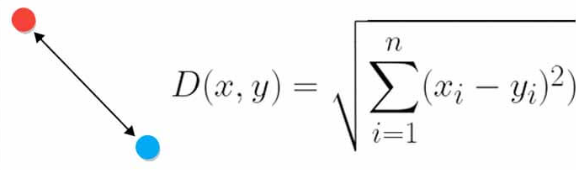
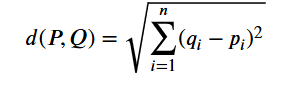
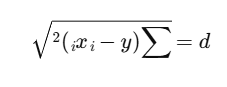

فاصله مانهتن (Manhattan Distance)

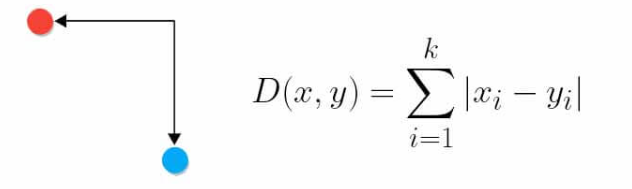

فاصله چبیشف (Chebyshev Distance)

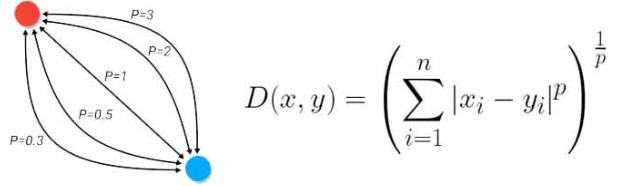
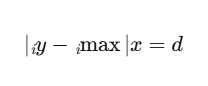

فاصله کسینوسی (Cosine Distance)

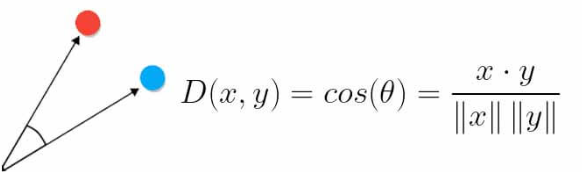
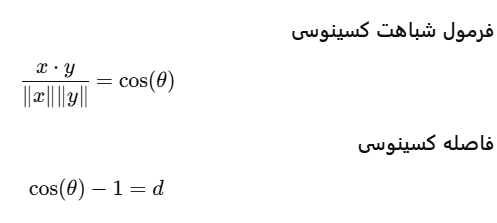

فاصله ماهالانوبیس (Mahalanobis Distance)

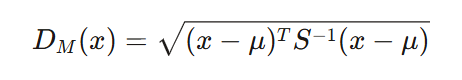

In [55]:
def Mahalanobis_Distance(x,y,cov_inv):
    x=np.array(x)
    y=np.array(y)
    diff_m=x-y
    return np.sqrt(diff_m.T @ cov_inv @ diff_m)  
    


In [56]:
print(len(Test))

6


In [57]:
result=[]
for x in range(len(Test)):
    for y in range(x+1,len(Test)):
        i=Test.iloc[x].values
        j=Test.iloc[y].values
        result.append({
        'Euclidean_Distance':np.sqrt(np.sum((i-j)**2)),
        'Manhattan_Distance':np.sum(np.abs(i-j)),
        'Chebyshev_Distance':np.max(np.abs(i - j)),
        'Cosine_Distance':1-(np.dot(i,j)/(np.linalg.norm(i)*np.linalg.norm(j))),
        'Mahalanobis_Distance':Mahalanobis_Distance(i,j,cov_inv)})
df_result=pd.DataFrame(result)
df_result

,Euclidean_Distance,Manhattan_Distance,Chebyshev_Distance,Cosine_Distance,Mahalanobis_Distance
0,536.861342,733.814074,509.0,0.003552,3.162302
1,520.611016,730.975295,493.0,0.003100,3.162294
2,1260.240648,1875.849886,1128.5,0.013594,3.162633
3,1692.859567,2564.059234,1446.0,0.011316,3.163621
4,1133.326142,1707.046058,982.5,0.002472,3.162686
5,25.582659,62.512311,16.0,0.000083,3.162307
6,732.710957,1143.509688,619.5,0.003309,3.162327
7,1176.339141,1831.677342,937.0,0.004564,3.163322
8,617.002360,974.707532,473.5,0.000443,3.162423
9,747.824563,1152.490043,635.5,0.003894,3.162628


تحلیل رفتار انواع فاصله‌ها (بر اساس جدول محاسبات)

فاصله Euclidean (اُقلیدسی)

به مقیاس و اندازه مطلق ویژگی‌ها حساس است.

اختلاف‌های بزرگ در یک ویژگی می‌تواند فاصله را به شدت افزایش دهد.

برای مثال، اگر یکی از ویژگی‌ها مقدار بسیار بزرگ داشته باشد، اختلاف در همان ویژگی بیشترین تأثیر را دارد.

فاصله Manhattan (منهتن)

مانند Euclidean، به مقیاس حساس است، ولی وزن اختلاف‌های بزرگ کمتر از Euclidean است.

مجموع اختلاف‌ها در همه ویژگی‌ها را در نظر می‌گیرد و توزیع خطی دارد.

فاصله Chebyshev (چبی‌شِف)


تنها بیشترین اختلاف بین ویژگی‌ها را در نظر می‌گیرد.

بقیه ویژگی‌ها تقریباً تأثیری ندارند.

مفید برای زمانی که یک ویژگی مهم و تعیین‌کننده وجود دارد.

فاصله Cosine (کسینوسی)

بیشتر روی جهت بردار ویژگی‌ها تمرکز دارد و کمتر به مقیاس وابسته است.

دو نمونه با مقادیر متفاوت ولی الگوی مشابه، فاصله کسینوسی کمی دارند.

مناسب برای مقایسه الگوهای کلی به جای مقدار مطلق.

فاصله Mahalanobis (ماهالانوبیس)

پراکندگی و همبستگی ویژگی‌ها را در نظر می‌گیرد.

ویژگی‌هایی که همبستگی زیادی با دیگر ویژگی‌ها دارند، وزن کمتری داده می‌شود.

برای داده‌های پزشکی و پزشکی تشخیصی مناسب‌تر است، چون اختلاف در ویژگی‌های مستقل و پراکنده را بهتر بازتاب می‌دهد.

انتخاب فاصله:

Mahalanobis: بهترین انتخاب برای داده‌های پزشکی است.

مزایا:

پراکندگی و همبستگی بین ویژگی‌ها را لحاظ می‌کند.

حساسیت زیاد به ویژگی‌های پرت و همبسته را کاهش می‌دهد.

نمونه‌هایی که از الگوی بدخیمی واقعی فاصله زیادی دارند را بهتر تشخیص می‌دهد.

ریسک‌ها:

اگر تعداد نمونه‌ها کم باشد یا کوواریانس دقیق محاسبه نشود، ممکن است فاصله اشتباه بدهد.

Cosine:

خوب است اگر بخواهیم بیشتر به الگوی ویژگی‌ها (جهت بردار) توجه کنیم و مقیاس مطلق کمتر اهمیت داشته باشد.

Euclidean یا Manhattan:

مزایا: ساده و سریع محاسبه می‌شوند.

ریسک‌ها:

به مقیاس و بزرگی مطلق ویژگی‌ها حساس‌اند.

در داده‌های پزشکی، ویژگی‌ها مقیاس‌های متفاوت دارند و استفاده ناآگاهانه از Euclidean می‌تواند باعث تشخیص اشتباه خوش‌خیم به عنوان بدخیم یا برعکس شود.

این اشتباه‌ها می‌توانند تصمیمات خطرناک پزشکی (مثل جراحی غیرضروری یا تاخیر درمان) ایجاد کنند.

خلاصه: در سیستم هشدار اولیه، بهتر است از فاصله‌هایی استفاده کنیم که مقیاس و همبستگی ویژگی‌ها را در نظر بگیرند (مثل Mahalanobis) یا حداقل داده‌ها را نرمالیزه کنیم قبل از Euclidean.

تفاوت مفهومی «مقیاس» و «جهت» در بردارهای ویژگی

مقیاس (Magnitude): طول یا اندازه بردار ویژگی‌ها.

مثال: دو نمونه با ویژگی‌های مشابه اما مقادیر متفاوت ۱۰ برابر، مقیاسشان متفاوت است.

جهت (Direction): الگوی نسبی ویژگی‌ها یا نسبت بین مقادیر ویژگی‌ها.

مثال: اگر یک نمونه همه ویژگی‌ها را ۱۰ برابر کند، جهت همان است، ولی مقیاس تغییر کرده.

تأثیر روی فاصله‌ها در داده‌ی Cancer Breast:

Euclidean و Manhattan بیشتر به مقیاس حساس هستند: نمونه‌هایی با مقادیر بزرگتر فاصله بزرگ می‌گیرند حتی اگر الگوی ویژگی‌ها مشابه باشد.

Cosine بیشتر به جهت حساس است: نمونه‌هایی که الگو مشابه دارند، حتی با مقیاس متفاوت، فاصله کمی دارند.

Mahalanobis ترکیبی از مقیاس و پراکندگی/همبستگی را لحاظ می‌کند، بنابراین فاصله واقعی نمونه‌های مشکوک بهتر بازتاب داده می‌شود.